In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('docking.csv').sort_values('Energy')
df

,Program,Ligand,Initial Pose,Pose,Exhaustiveness,Energy Range,Energy,RMSD,Execution
1298,Vina,B,random,1,8,1,-8.0,5.537,3
40,Vina,A,crystal,1,24,1,-7.9,3.807,3
1300,Vina,B,random,3,8,1,-7.9,3.245,3
1299,Vina,B,random,2,8,1,-7.9,3.430,3
1301,Vina,B,random,4,8,1,-7.8,4.371,3
...,...,...,...,...,...,...,...,...,...
1665,QVina,A,crystal,19,8,3,-5.6,4.544,1
2001,QVina,A,random,19,8,3,-5.5,6.154,1
2373,QVina,B,crystal,20,8,3,-5.5,4.529,3
1666,QVina,A,crystal,20,8,3,-5.5,5.149,1


In [2]:
good = 0
average = 0
bad = 0
dictio = {'Vina': {'good': 0, 'average': 0, 'bad': 0}, 'QVina': {'good': 0, 'average': 0, 'bad': 0}}
for i in range(len(df['RMSD'])):
    if df['RMSD'][i] <= 2:
        good+=1
        dictio[df['Program'][i]]['good']+=1
    elif df['RMSD'][i] <= 3:
        average+=1
        dictio[df['Program'][i]]['average']+=1
    else:
        bad+=1
        dictio[df['Program'][i]]['bad']+=1
print('Resultados classificados como bons (RMSD <= 2):',good)
print('Resultados classificados como medianos (2 < RMSD <= 3):',average)
print('Resultados classificados como ruins (RMSD > 3):',bad)
print(dictio)

Resultados classificados como bons (RMSD <= 2): 6
Resultados classificados como medianos (2 < RMSD <= 3): 21
Resultados classificados como ruins (RMSD > 3): 2699
{'Vina': {'good': 4, 'average': 13, 'bad': 1359}, 'QVina': {'good': 2, 'average': 8, 'bad': 1340}}


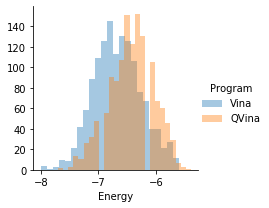

In [3]:
dist1 = sns.FacetGrid(df,hue='Program')
dist1.map(sns.distplot,'Energy',kde=False).add_legend()

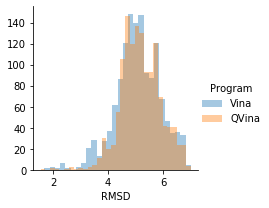

In [4]:
dist2 = sns.FacetGrid(df,hue='Program')
dist2.map(sns.distplot,'RMSD',kde=False).add_legend()

Pearson-r: 0.01325720857396551 | P-value: 0.48900859930158913
Spearman-r: -0.008873687990821642 | P-value: 0.6432914543734304
R^2: 0.0132572085739654 | P-value: 0.4890085993019624


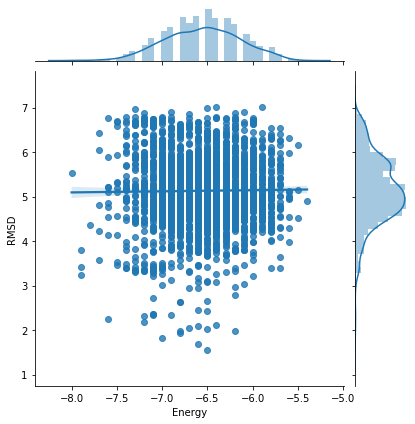

In [5]:
sns.jointplot(x='Energy',y='RMSD',data=df,kind='reg')

import scipy.stats
pearson_r, p_value1 = scipy.stats.pearsonr(x=df['Energy'],y=df['RMSD'])
spearman_r, p_value2 = scipy.stats.spearmanr(a=df['Energy'],b=df['RMSD'])
r_squared, p_value3 = scipy.stats.linregress(x=df['Energy'],y=df['RMSD'])[2:4]
print('Pearson-r:',pearson_r,'| P-value:',p_value1)
print('Spearman-r:',spearman_r,'| P-value:',p_value2)
print('R^2:',r_squared,'| P-value:',p_value3)

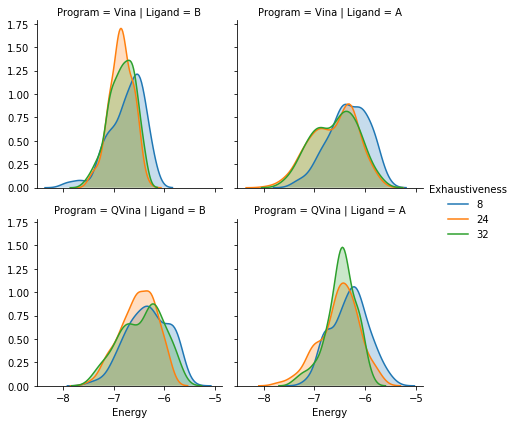

In [6]:
kde1 = sns.FacetGrid(df,col='Ligand',row='Program',hue='Exhaustiveness')
kde1.map(sns.kdeplot,'Energy',shade=True).add_legend()

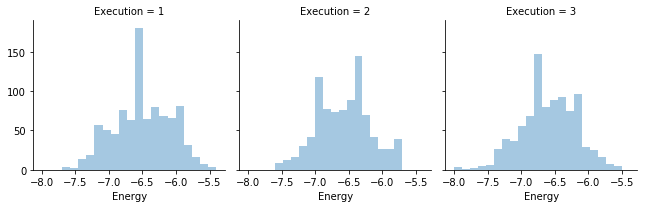

In [9]:
exe = sns.FacetGrid(df,col='Execution')
exe.map(sns.distplot,'Energy',kde=False).add_legend()

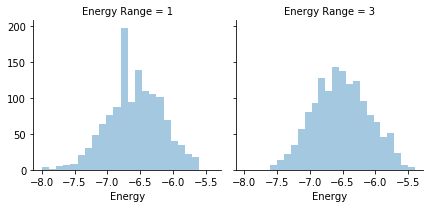

In [10]:
er = sns.FacetGrid(df,col='Energy Range')
er.map(sns.distplot,'Energy',kde=False).add_legend()